#New Synthetic Data - Method 2: Mockaroo

This notebook introduces Mockaroo, an online tool designed for generating random data and mocking APIs. With Mockaroo, users can effortlessly create custom datasets in formats such as CSV, JSON, SQL, and Excel without the need for programming. It offers a user-friendly interface that allows users to specify their desired data specifications and generate synthetic data with ease. Whether you need to create test datasets or simulate API responses, Mockaroo provides a hassle-free solution without requiring any coding knowledge. Users can generate up to 1000 rows of synthetic data tailored to their requirements, making it a versatile tool for various data generation needs.

The dataset described in the paper "Enhancing Anti-Money Laundering: Development of a Synthetic Transaction Monitoring Dataset" was presented at the 2023 IEEE International Conference on e-Business Engineering (ICEBE) in Sydney, Australia. The dataset was developed by B. Oztas, D. Cetinkaya, F. Adedoyin, M. Budka, H. Dogan, and G. Aksu. It aims to enhance anti-money laundering efforts by providing a synthetic transaction monitoring dataset.

This dataset likely contains financial transactions. It may include various features such as sender and receiver account numbers, transaction amounts, timestamps, and indicators for potential money laundering activities.

**Reference**

* https://www.mockaroo.com/

* B. Oztas, D. Cetinkaya, F. Adedoyin, M. Budka, H. Dogan and G. Aksu, "Enhancing Anti-Money Laundering: Development of a Synthetic Transaction Monitoring Dataset," 2023 IEEE International Conference on e-Business Engineering (ICEBE), Sydney, Australia, 2023, pp. 47-54, doi: 10.1109/ICEBE59045.2023.00028.
https://ieeexplore.ieee.org/document/10356193

In [ ]:
#import image libraries
from google.colab import files
from IPython.display import Image

In [ ]:
#load image
uploaded = files.upload()

Saving mockaroo.png to mockaroo.png


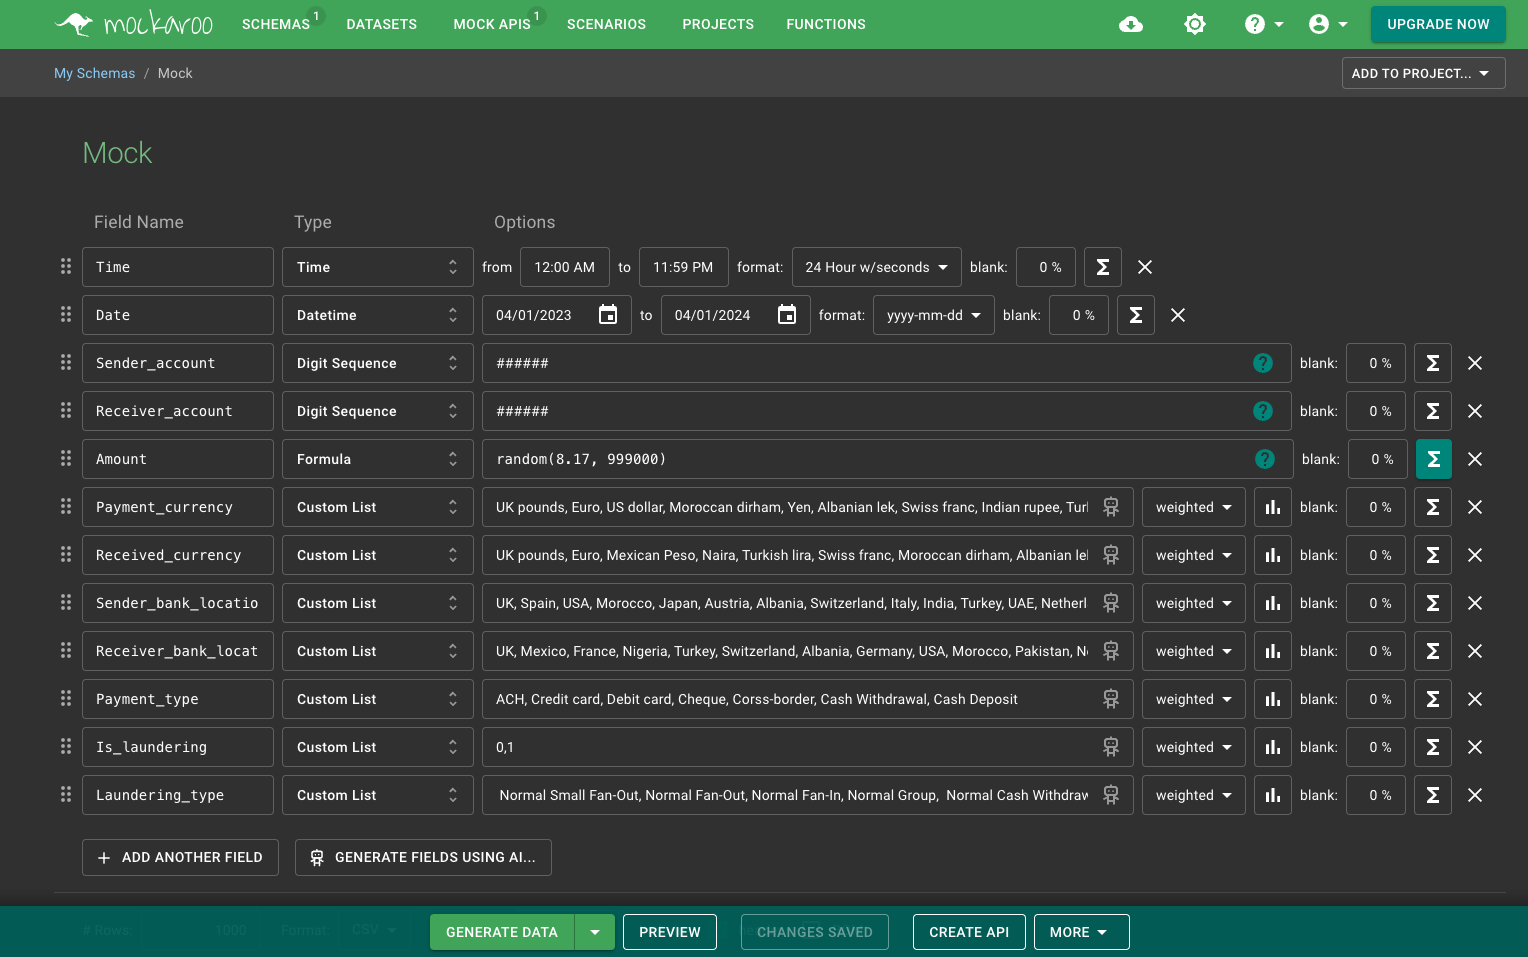

In [ ]:
#Show image
Image('mockaroo.png')

**The first step is to import real dataset:**

In [ ]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile

# Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/data.zip'

# Open the zip file and read the CSV file into a DataFrame
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    # Assuming the CSV file inside the zip is named 'data.csv'
    data = pd.read_csv(zf.open('SAML-D.csv'))

# Now 'data' contains your data from the CSV file
data.head()  # Display the first few rows

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


#Explorative Data Analysis


Descriptive statistics play a crucial role in understanding the characteristics of a dataset. By analysing the distribution of each column, we gain insights into the central tendency, variability, and shape of the data. Let's delve into the details:

1. Central Tendency:
* The mean (average) provides a measure of the central value of a column. It
represents the typical value around which the data points cluster.

* The median (middle value) is another central measure. It divides the data into two equal halves, making it less sensitive to extreme values.

* The mode (most frequent value) indicates the most common data point.

2. Variability:

* The range (difference between the maximum and minimum values) gives an idea of the spread of the data.

* The variance and standard deviation quantify the dispersion around the mean. Larger values indicate greater variability.

3. Shape of the Distribution:

* A histogram visually displays the frequency distribution of a continuous variable. It helps identify patterns such as symmetry, skewness, or multimodality.

* Skewness measures the asymmetry of the distribution. A positive skew indicates a longer tail on the right, while a negative skew has a longer left tail.

Transaction data information:

The SAML dataset has 12 columns with 9504852. We observe three data types integer, object, and float.

In [ ]:
# The dimension of the dataset

print("Type  of data: ", type(data))
print("Shape of data: ", data.shape)
print("----------------------------------------------")
print("----------------------------------------------")
print("Data information:", data.info())

Type  of data:  <class 'pandas.core.frame.DataFrame'>
Shape of data:  (9504852, 12)
----------------------------------------------
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
Data information: None


Missing data:

There seems to be no missing values in the SAML dataset.

In [ ]:
#Count the number of missing values for each column

print("Is there missing values in the dataset")
print("--------------------------------------")
print("--------------------------------------")
data.isnull().sum()

Is there missing values in the dataset
--------------------------------------
--------------------------------------


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

Description of the dataset:

The dataset provides descriptive statistics on financial transactions, encompassing sender and receiver account numbers, transaction amounts, and indicators for potential money laundering. With over 9.5 million entries, the mean sender and receiver account numbers indicate a significant diversity in transaction origins and destinations. The standard deviations imply notable variability around the mean, highlighting the range of account values involved. Transaction amounts exhibit a wide distribution, with a mean of approximately 8,763 dollars and a standard deviation of around 25,615 dollars, suggesting a varied financial landscape within the dataset. The presence of a binary indicator for potential money laundering shows that only a very small fraction, about 0.1%, of transactions are flagged, though this still represents a non-negligible concern. Overall, the dataset portrays a complex financial network with diverse transaction sizes and minimal instances of flagged suspicious activity.


The dataset provides additional insights into the characteristics of financial transactions, including payment and received currencies, sender and receiver bank locations, payment types, and laundering types. With nearly 9.5 million entries, it offers a comprehensive view of financial activity. The dominance of UK pounds as both the payment and received currency, indicated by over 90% of transactions, suggests a concentrated geographical focus on UK-based transactions. Similarly, the majority of transactions involve banks located in the UK for both senders and receivers, underscoring the domestic nature of the financial network. Payment types primarily revolve around credit card transactions, indicating a reliance on electronic payment methods within the dataset. Additionally, the presence of various laundering types, with "Normal_Small_Fan_Out" being the most common, hints at potential illicit activities within the financial system. Overall, these insights shed light on the intricacies of financial transactions within the dataset, highlighting the prevalence of UK pounds, electronic payment methods, and potential laundering activities.

In [ ]:
# Descriptive Statistics
print("dataset descriptive statistics: ")
print("----------------------------------------------")
print("----------------------------------------------")
print(data.describe().transpose())
print("----------------------------------------------")
print("----------------------------------------------")
print("Categorical data descriptive statistics: ")
print(data.describe(include='object').transpose())

dataset descriptive statistics: 
----------------------------------------------
----------------------------------------------
                      count          mean           std      min  \
Sender_account    9504852.0  5.006619e+09  2.885814e+09  9018.00   
Receiver_account  9504852.0  5.006006e+09  2.884763e+09  9018.00   
Amount            9504852.0  8.762968e+03  2.561495e+04     3.73   
Is_laundering     9504852.0  1.038733e-03  3.221263e-02     0.00   

                           25%           50%           75%           max  
Sender_account    2.513133e+09  5.001017e+09  7.505051e+09  9.999987e+09  
Receiver_account  2.513219e+09  5.002572e+09  7.502397e+09  9.999971e+09  
Amount            2.143688e+03  6.113720e+03  1.045846e+04  1.261850e+07  
Is_laundering     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
----------------------------------------------
----------------------------------------------
Categorical data descriptive statistics: 
                     

Unique values:

This code will show us the different values in each chosen variable in the dataset.

In [ ]:
# Replace 'column1', 'column2', and 'column3' with your actual column names
selected_columns = ['Payment_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']

# Create a dictionary to store unique values for each selected column
unique_values_dict = {col: data[col].unique() for col in selected_columns}

# Convert the dictionary to a Pandas Series for a neat display
unique_values_series = pd.Series(unique_values_dict)

# Print the unique values for each selected column
unique_values_df = pd.DataFrame(unique_values_series, columns=['Unique Values'])

# Print the resulting DataFrame
unique_values_df

,Unique Values
Payment_currency,"[UK pounds, Indian rupee, Albanian lek, Swiss ..."
Sender_bank_location,"[UK, Albania, Nigeria, Japan, Spain, Switzerla..."
Receiver_bank_location,"[UK, UAE, Spain, France, USA, Mexico, Albania,..."
Payment_type,"[Cash Deposit, Cross-border, Cheque, ACH, Cred..."
Laundering_type,"[Normal_Cash_Deposits, Normal_Fan_Out, Normal_..."


Percentage of values in each chosen column:

In [ ]:
# Percentage of each value in the 'Payment_currency' column
data['Payment_currency'].value_counts(normalize=True)

Payment_currency
UK pounds          0.957331
Euro               0.012327
Turkish lira       0.002945
Swiss franc        0.002892
Dirham             0.002868
Pakistani rupee    0.002861
Naira              0.002856
US dollar          0.002742
Yen                0.002689
Moroccan dirham    0.002672
Mexican Peso       0.002615
Albanian lek       0.002607
Indian rupee       0.002594
Name: proportion, dtype: float64

In [ ]:
# Percentage of each value in the 'Received_currency' column
data['Received_currency'].value_counts(normalize=True)

Received_currency
UK pounds          0.924123
Euro               0.024399
Pakistani rupee    0.004839
Yen                0.004820
Moroccan dirham    0.004813
Albanian lek       0.004812
Mexican Peso       0.004761
Naira              0.004739
Indian rupee       0.004604
US dollar          0.004594
Swiss franc        0.004517
Dirham             0.004503
Turkish lira       0.004476
Name: proportion, dtype: float64

In [ ]:
# Percentage of each value in the 'Receiver_bank_location' column
data['Receiver_bank_location'].value_counts(normalize=True)

In [ ]:
# Assuming you have a pandas DataFrame 'data' with a column 'Received_currency'
data['Payment_type'].value_counts(normalize=True)

In [ ]:
# Assuming you have a pandas DataFrame 'data' with a column 'Received_currency'
data['Is_laundering'].value_counts(normalize=True)

Is_laundering
0    0.998961
1    0.001039
Name: proportion, dtype: float64

In [ ]:
# Assuming you have a pandas DataFrame 'data' with a column 'Received_currency'
data['Laundering_type'].value_counts(normalize=True)

## Visualisation for Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the 'Fraudulent' column with different colors
sns.countplot(x='Is_laundering', data=data, palette=['skyblue', 'salmon'])

# Add percentages on top of bars
plt.bar_label(plt.gca().containers[0])

# Show the plot
plt.show()

In [ ]:
#import plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Sender_account column as a KDE on the first subplot
sns.kdeplot(data['Sender_account'], ax=ax1)
ax1.set_title('Sender_account KDE')

# Plot the Receiver_account column as a KDE on the second subplot
sns.kdeplot(data['Receiver_account'], ax=ax2)
ax1.set_title('Receiver_account KDE')

# Plot the Amount column as a KDE on the second subplot
sns.kdeplot(data['Amount'], ax=ax3)
ax1.set_title('Amount KDE')

# Online Generated Mockaroo Synthetic Dataset

In [ ]:
# Import dataset
import pandas as pd

#Upload Mockaroo dataset
df = pd.read_csv('/content/Mock.csv')

#First five rows
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,16:35:33,2023-06-22,547178,213846,440937.471095,UK pounds,UK pounds,Germany,UK,Credit card,0,Normal Small Fan-Out
1,1:59:22,2023-04-27,839927,22718,991217.078165,UK pounds,UK pounds,UK,UK,Debit card,0,Normal Fan-In
2,0:09:42,2023-07-19,590985,652054,737867.918935,UK pounds,UK pounds,UK,UK,Debit card,0,Normal Fan-In
3,18:35:52,2023-12-31,570253,927204,513266.296763,UK pounds,UK pounds,UK,UK,Cheque,0,Normal Small Fan-Out
4,11:16:34,2023-07-29,321363,228728,658829.746507,UK pounds,UK pounds,UK,UK,Credit card,0,Normal Fan-In


In [ ]:
# The dimension of the dataset

print("Type  of data: ", type(df))
print("Shape of data: ", df.shape)
print("----------------------------------------------")
print("----------------------------------------------")
print("Data information:", df.info())

Type  of data:  <class 'pandas.core.frame.DataFrame'>
Shape of data:  (1000, 12)
----------------------------------------------
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   object 
 1   Date                    1000 non-null   object 
 2   Sender_account          1000 non-null   int64  
 3   Receiver_account        1000 non-null   int64  
 4   Amount                  1000 non-null   float64
 5   Payment_currency        1000 non-null   object 
 6   Received_currency       1000 non-null   object 
 7   Sender_bank_location    1000 non-null   object 
 8   Receiver_bank_location  1000 non-null   object 
 9   Payment_type            1000 non-null   object 
 10  Is_laundering           1000 non-null   int64  
 11  Laundering_type         1

In [ ]:
# Count the number of missing values for each column

print("Is there missing values in the dataset")
print("--------------------------------------")
print("--------------------------------------")
df.isnull().sum()

Is there missing values in the dataset
--------------------------------------
--------------------------------------


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [ ]:
# Descriptive Statistics
print("dataset descriptive statistics: ")
print("----------------------------------------------")
print("----------------------------------------------")
print(df.describe().transpose())
print("----------------------------------------------")
print("----------------------------------------------")
print("Categorical data descriptive statistics: ")
print(df.describe(include='object').transpose())

dataset descriptive statistics: 
----------------------------------------------
----------------------------------------------
                   count          mean            std          min  \
Sender_account    1000.0  491674.23000  281995.894826  2786.000000   
Receiver_account  1000.0  517990.53800  293742.493173   518.000000   
Amount            1000.0  513560.94109  287563.886394    71.827564   
Is_laundering     1000.0       0.02600       0.159215     0.000000   

                            25%            50%            75%            max  
Sender_account    246885.500000  496877.000000  722778.750000  999565.000000  
Receiver_account  271131.000000  522324.000000  773977.750000  999954.000000  
Amount            258805.041966  524167.854386  760678.131256  997792.080168  
Is_laundering          0.000000       0.000000       0.000000       1.000000  
----------------------------------------------
----------------------------------------------
Categorical data descriptive stat

#Evaluation

Text(0.5, 1.0, 'Synthetic Receiver Account KDE')

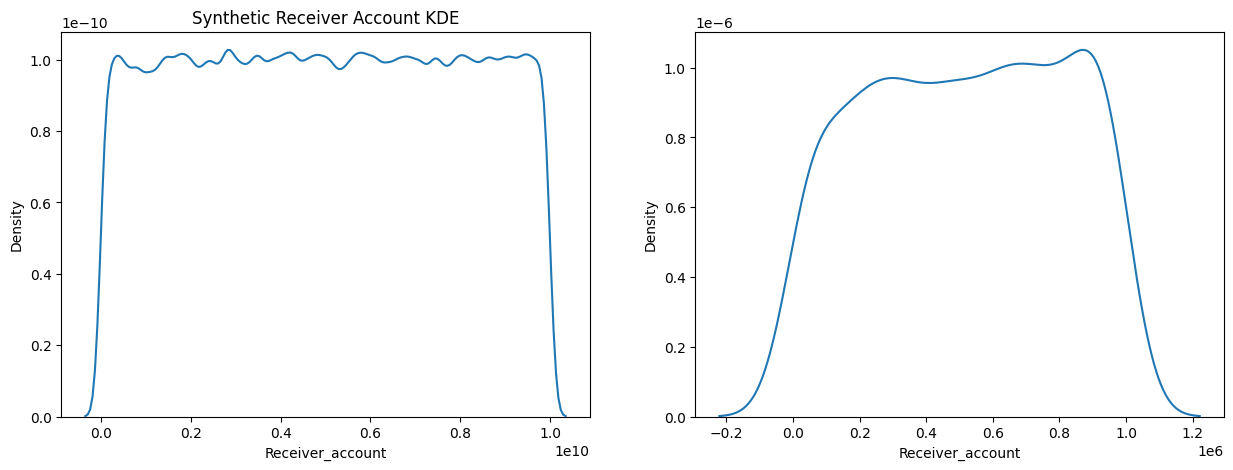

In [ ]:
#import plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Plot KDE for real dataset and synthetic dataset
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Receiver_account column as a KDE on the first subplot
sns.kdeplot(data['Receiver_account'], ax=ax1)
ax1.set_title('Receiver Account KDE')

# Plot the Receiver_account column as a KDE on the second subplot
sns.kdeplot(df['Receiver_account'], ax=ax2)
ax1.set_title('Synthetic Receiver Account KDE')

Text(0.5, 1.0, 'Synthetic Sender_account synthetic')

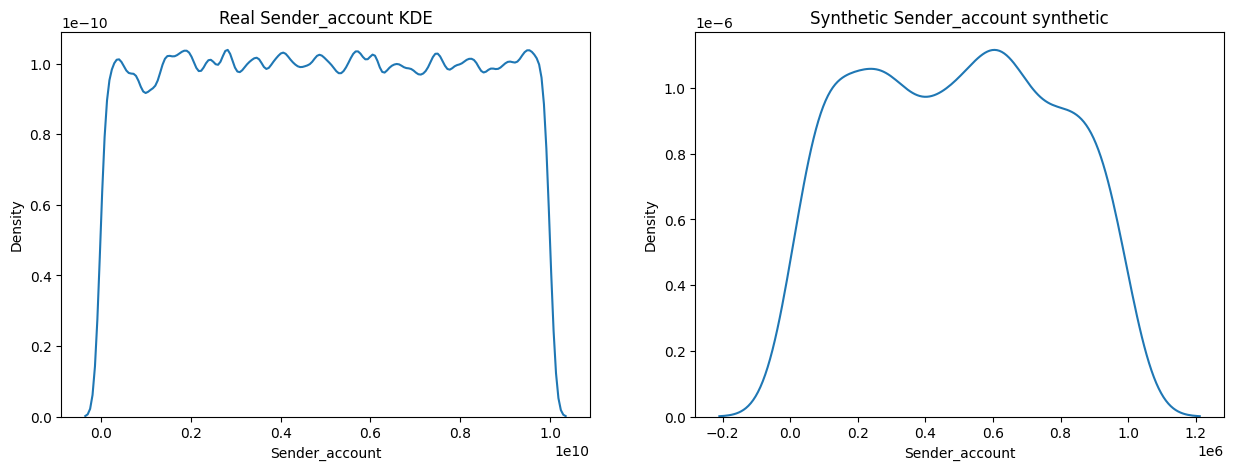

In [ ]:
#Plot KDE for real dataset and synthetic dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Receiver_account column as a KDE on the first subplot
sns.kdeplot(data['Sender_account'], ax=ax1)
ax1.set_title('Real Sender_account KDE')

# Plot the Receiver_account column as a KDE on the second subplot
sns.kdeplot(df['Sender_account'], ax=ax2)
ax2.set_title('Synthetic Sender_account')

Text(0.5, 1.0, 'Synthetic Laundering')

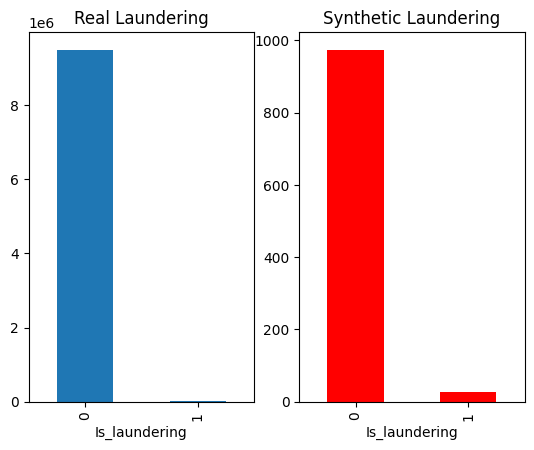

In [ ]:
# Plot bar chart for laundering variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Is_laundering'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real Laundering')

# Plot the second bar chart on the second subplot
df['Is_laundering'].value_counts().plot(kind='bar', color='red', ax=ax2)
ax2.set_title('Synthetic Laundering')

Explain why some values are missing because weight

Text(0.5, 1.0, 'Synthetic data(Payment_currency)')

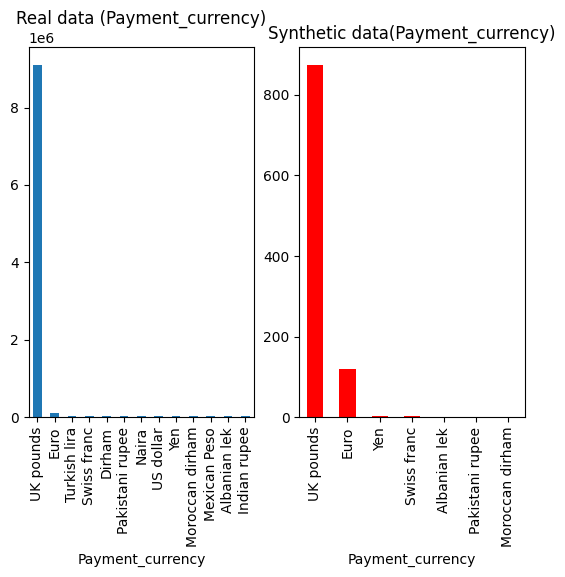

In [ ]:
# Plot bar chart for payment currency variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Payment_currency'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real data (Payment_currency)')

# Plot the second bar chart on the second subplot
df['Payment_currency'].value_counts().plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Synthetic data(Payment_currency)')

Text(0.5, 1.0, 'Synthetic data(Sender_Bank__Location)')

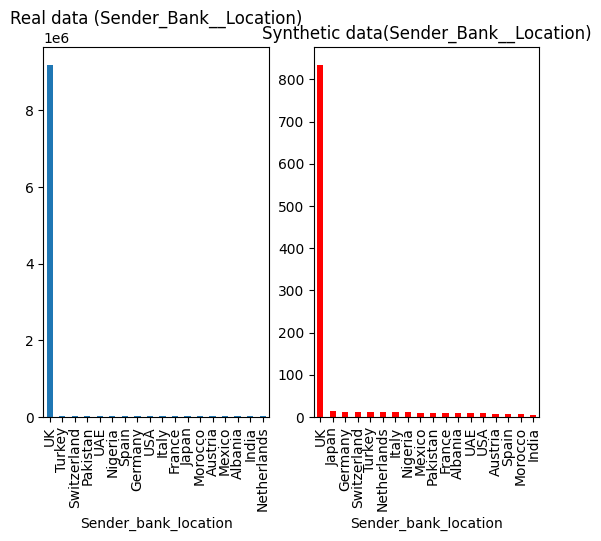

In [ ]:
# Plot bar chart for Sender Bank Location variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Sender_bank_location'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real data (Sender_Bank__Location)')

# Plot the second bar chart on the second subplot
df['Sender_bank_location'].value_counts().plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Synthetic data(Sender_Bank__Location)')

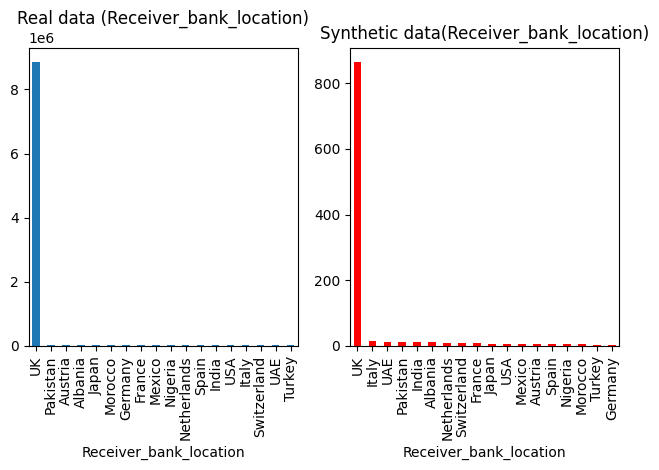

In [ ]:
# Plot bar chart for Receiver Bank Location variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Receiver_bank_location'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real data (Receiver_bank_location)')

# Plot the second bar chart on the second subplot
df['Receiver_bank_location'].value_counts().plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Synthetic data(Receiver_bank_location)')

#show plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Synthetic data(Payment_type)')

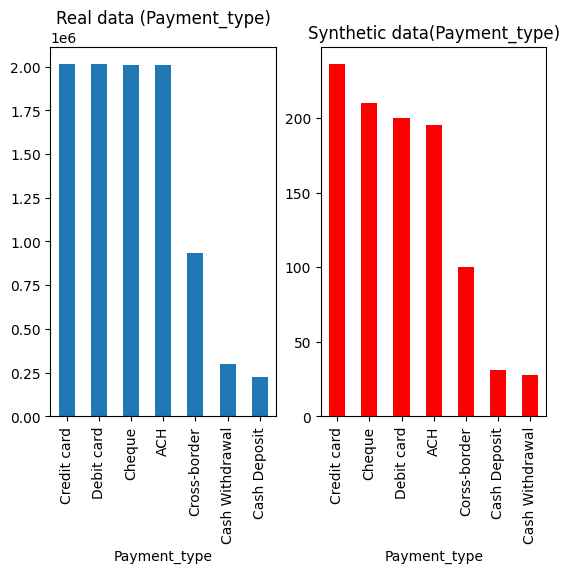

In [ ]:
# Plot bar chart for Payment type variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Payment_type'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real data (Payment_type)')

# Plot the second bar chart on the second subplot
df['Payment_type'].value_counts().plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Synthetic data(Payment_type)')

Text(0.5, 1.0, 'Synthetic data(Laundering_type)')

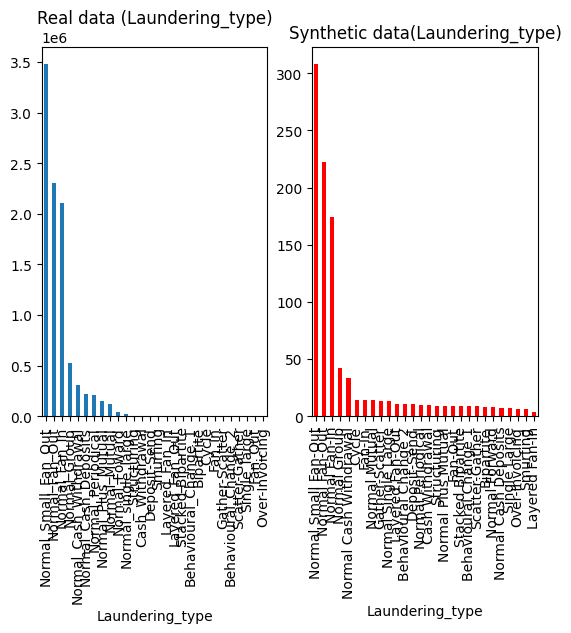

In [ ]:
# Plot bar chart for Laundering type variable

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot
data['Laundering_type'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Real data (Laundering_type)')

# Plot the second bar chart on the second subplot
df['Laundering_type'].value_counts().plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Synthetic data(Laundering_type)')

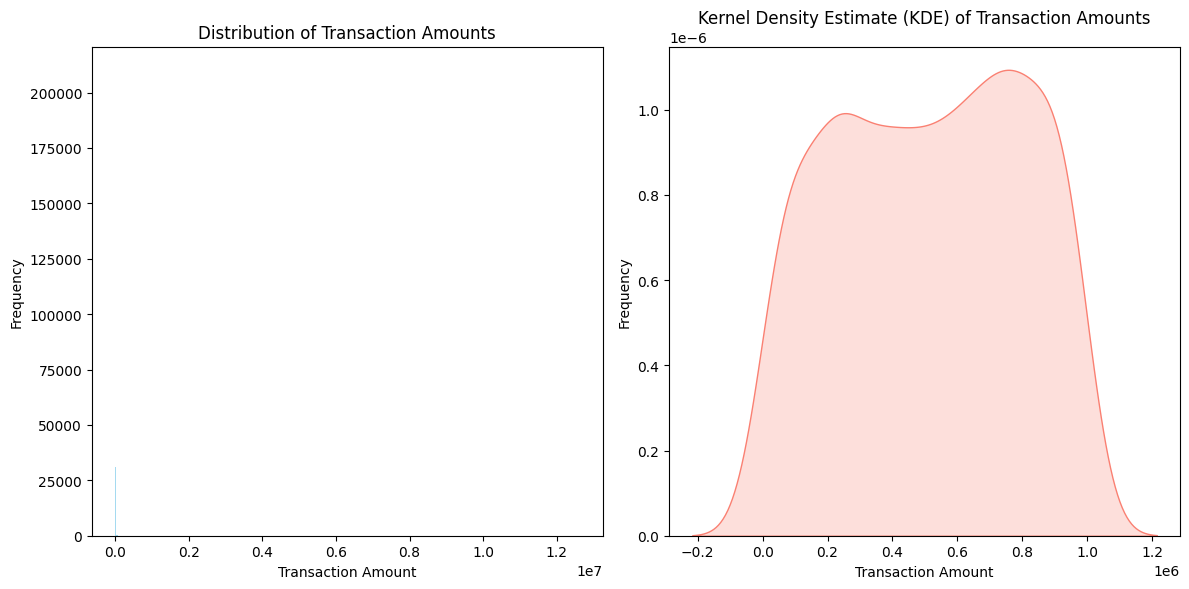

In [ ]:
#Plot transaction amount

# Create a side-by-side plot with two histograms
plt.figure(figsize=(12, 6))

# Plot the distribution of transaction amounts
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="Amount", color="skyblue", fill=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")

# Plot the kernel density estimate (KDE) of transaction amounts
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Amount", color="salmon", fill=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Kernel Density Estimate (KDE) of Transaction Amounts")

#show plot
plt.tight_layout()
plt.show()

# Recommendation

The results indicated that the dataset used for the comparison, “SAML-D” dataset had certain characteristics in the distribution of there data, which was lacking in the mockaroo dataset. Although we would be able to add minor tweaks in order to re-engineer the dataset with the necessary characteristics, an exact replication of the characteristics would be nearly impossible. But at the end of the day the mockaroo dataset can still be used for certain applications such as flagging fraud transactions by manipulating data at random intervals.